In [ ]:
#3 Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of customers to predict customer response for special offers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales=pd.read_csv('/content/Mall_Customers - Mall_Customers.csv')

In [ ]:
sales = pd.get_dummies(sales,columns = ["Genre"])

In [ ]:
sales.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [ ]:
sales.shape

(200, 6)

In [ ]:
sales.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000


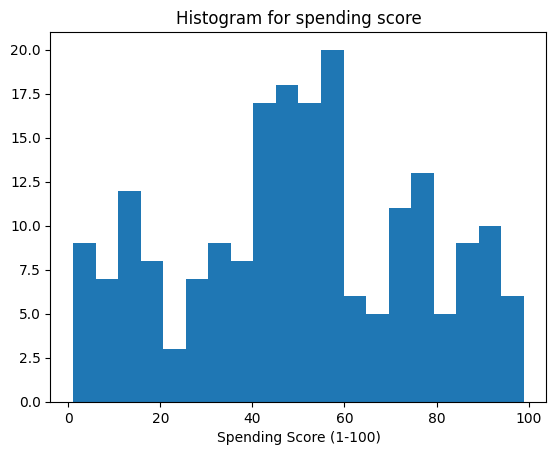

In [ ]:
plt.hist(sales['Spending Score (1-100)'],bins=20)
plt.xlabel('Spending Score (1-100)')
plt.title('Histogram for spending score')
plt.show()

In [ ]:
x =sales.iloc[:,[0,1,2,4,5]]
print(x)

     CustomerID  Age  Annual Income (k$)  Genre_Female  Genre_Male
0             1   19                  15             0           1
1             2   21                  15             0           1
2             3   20                  16             1           0
3             4   23                  16             1           0
4             5   31                  17             1           0
..          ...  ...                 ...           ...         ...
195         196   35                 120             1           0
196         197   45                 126             1           0
197         198   32                 126             0           1
198         199   32                 137             0           1
199         200   30                 137             0           1

[200 rows x 5 columns]


In [ ]:
y=sales.iloc[:,[3]]
print(y)

     Spending Score (1-100)
0                        39
1                        81
2                         6
3                        77
4                        40
..                      ...
195                      79
196                      28
197                      74
198                      18
199                      83

[200 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [ ]:
classifier = SVC(kernel = "linear", random_state=0)

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
r2_square = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("R2 score: {0}\nMSE: {1}\nMAE: {2}".format(r2_square,mse,mae))

R2 score: 0.09617996827594677
MSE: 572.9666666666667
MAE: 16.266666666666666
